# Reddit Data Cleaning

In [1]:
#Importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import contractions
import unicodedata
import re

In [2]:
# Sample DataFrame
df = pd.read_csv("Reddit_data_full.csv")

In [3]:
#Lets look at the data
df

,title,text,url,subreddit,date
0,Climate Change - A Timeline,NaN,https://i.redd.it/nnxapy263q3a1.jpg,Conservative,12/3/2022 18:03
1,Still think climate change isn't real?,https://www.nbcnews.com/news/weather/hot-tub-w...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,My favorite climate change fact that will blow...,My favorite climate change fact. I feel like t...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,Are we really doomed by climate change?,"Reddit is always very doom and gloom, and obvi...",https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
4,NASA made an animation to clearly illustrate h...,NaN,https://v.redd.it/rwm9gvyn2vxa1,Damnthatsinteresting,5/4/2023 18:53
...,...,...,...,...,...
7620,Growing mushrooms alongside trees could feed m...,NaN,https://www.pnas.org/doi/10.1073/pnas.2220079120,science,3/14/2023 13:19
7621,"Climate change: The rich are to blame, interna...",NaN,https://www.bbc.com/news/business-51906530,Futurology,4/14/2020 8:01
7622,New data reveals climate change might be more ...,NaN,https://wis-wander.weizmann.ac.il/environment/...,science,5/26/2022 19:51
7623,Obviously fighting climate change makes you a ...,NaN,https://i.redd.it/wf3fd6bnatn31.jpg,TheRightCantMeme,9/20/2019 20:51


In [4]:
#Making copy of the data
df_1=df

In [5]:
#Converting into proper data formats
df_1['text'] = df_1['text'].astype(str)
df_1['title'] = df_1['title'].astype(str)

In [6]:
#Removing NAN
df_1 = df_1[df_1['text'] != 'nan']
df_1 = df_1[df_1['title'] != 'nan']

In [7]:
# Cleaning Data - Fixing Contractions
df_1['title'] = df['title'].apply(lambda x: contractions.fix(x))
df_1['text'] = df['text'].apply(lambda x: contractions.fix(x))
df_1.head()

,title,text,url,subreddit,date
1,Still think climate change is not real?,https://www.nbcnews.com/news/weather/hot-tub-w...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,My favorite climate change fact that will blow...,My favorite climate change fact. I feel like t...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,Are we really doomed by climate change?,"Reddit is always very doom and gloom, and obvi...",https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
5,CMV: The potential porblems of climate change ...,I agree that climate change is a problem. I ag...,https://www.reddit.com/r/changemyview/comments...,changemyview,9/6/2022 21:24
7,When will climate change end the world?,"Hi, I am a young person that is concerned abou...",https://www.reddit.com/r/climatechange/comment...,climatechange,11/6/2022 17:35


In [8]:
#Normalizing
df_1['title'] = df_1['title'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1['text'] = df_1['text'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1.head()

,title,text,url,subreddit,date
1,Still think climate change is not real?,https://www.nbcnews.com/news/weather/hot-tub-w...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,My favorite climate change fact that will blow...,My favorite climate change fact. I feel like t...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,Are we really doomed by climate change?,"Reddit is always very doom and gloom, and obvi...",https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
5,CMV: The potential porblems of climate change ...,I agree that climate change is a problem. I ag...,https://www.reddit.com/r/changemyview/comments...,changemyview,9/6/2022 21:24
7,When will climate change end the world?,"Hi, I am a young person that is concerned abou...",https://www.reddit.com/r/climatechange/comment...,climatechange,11/6/2022 17:35


In [9]:
# Cleaning Data - Removing whitespaces
df_1['title'] = df_1['title'].apply(lambda x: ' '.join(x.split()))
df_1['text'] = df_1['text'].apply(lambda x: ' '.join(x.split()))
df_1.head()

,title,text,url,subreddit,date
1,Still think climate change is not real?,https://www.nbcnews.com/news/weather/hot-tub-w...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,My favorite climate change fact that will blow...,My favorite climate change fact. I feel like t...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,Are we really doomed by climate change?,"Reddit is always very doom and gloom, and obvi...",https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
5,CMV: The potential porblems of climate change ...,I agree that climate change is a problem. I ag...,https://www.reddit.com/r/changemyview/comments...,changemyview,9/6/2022 21:24
7,When will climate change end the world?,"Hi, I am a young person that is concerned abou...",https://www.reddit.com/r/climatechange/comment...,climatechange,11/6/2022 17:35


In [10]:
#Removing Punctuations
df_1['title'] = df_1['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1['text'] = df_1['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1.head()

,title,text,url,subreddit,date
1,Still think climate change is not real,httpswwwnbcnewscomnewsweatherhottubwatertemper...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,My favorite climate change fact that will blow...,My favorite climate change fact I feel like th...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,Are we really doomed by climate change,Reddit is always very doom and gloom and obvio...,https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
5,CMV The potential porblems of climate change a...,I agree that climate change is a problem I agr...,https://www.reddit.com/r/changemyview/comments...,changemyview,9/6/2022 21:24
7,When will climate change end the world,Hi I am a young person that is concerned about...,https://www.reddit.com/r/climatechange/comment...,climatechange,11/6/2022 17:35


In [11]:
# Initialize the Snowball Stemmer for English
stemmer = SnowballStemmer('english')

df_1['text'] = df_1['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_1['title'] = df_1['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df_1.head()

,title,text,url,subreddit,date
1,still think climat chang is not real,httpswwwnbcnewscomnewsweatherhottubwatertemper...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,my favorit climat chang fact that will blow li...,my favorit climat chang fact i feel like this ...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,are we realli doom by climat chang,reddit is alway veri doom and gloom and obviou...,https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
5,cmv the potenti porblem of climat chang are to...,i agre that climat chang is a problem i agre t...,https://www.reddit.com/r/changemyview/comments...,changemyview,9/6/2022 21:24
7,when will climat chang end the world,hi i am a young person that is concern about m...,https://www.reddit.com/r/climatechange/comment...,climatechange,11/6/2022 17:35


In [12]:
#df_1.to_csv("Reddit_data_after_Stemming.csv")

In [13]:
# Task 2: Lemmatization
lemmatizer = WordNetLemmatizer()

df_1['text'] = df_1['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df_1['title'] = df_1['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df_1.head()

,title,text,url,subreddit,date
1,still think climat chang is not real,httpswwwnbcnewscomnewsweatherhottubwatertemper...,https://i.redd.it/etjeuc1ol5eb1.jpg,facepalm,7/25/2023 18:23
2,my favorit climat chang fact that will blow li...,my favorit climat chang fact i feel like this ...,https://i.redd.it/323dbhex9vq91.jpg,Conservative,9/29/2022 21:35
3,are we realli doom by climat chang,reddit is alway veri doom and gloom and obviou...,https://www.reddit.com/r/AskScienceDiscussion/...,AskScienceDiscussion,3/19/2022 14:26
5,cmv the potenti porblem of climat chang are to...,i agre that climat chang is a problem i agre t...,https://www.reddit.com/r/changemyview/comments...,changemyview,9/6/2022 21:24
7,when will climat chang end the world,hi i am a young person that is concern about m...,https://www.reddit.com/r/climatechange/comment...,climatechange,11/6/2022 17:35


In [14]:
#df_1.to_csv("Reddit_data_after_Lemmatization.csv")

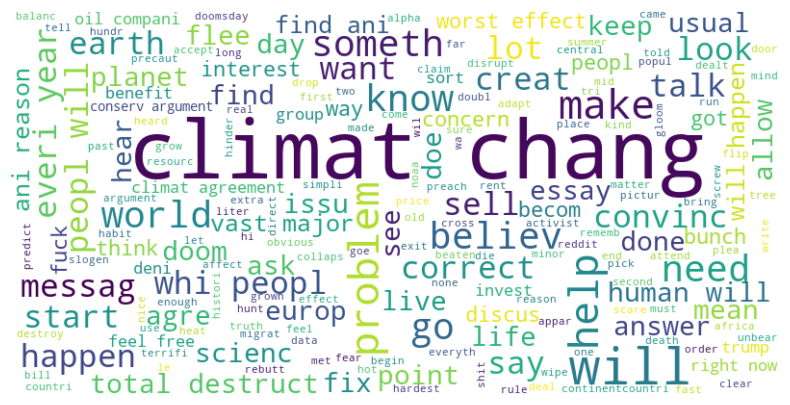

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate 'Title' and 'Description' columns
text = ' '.join(df_1['text']) + ' ' + ' '.join(df_1['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# Task 3: CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=1000)
count_matrix = count_vectorizer.fit_transform(df_1['text'])
count_df_1 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df_1.head()

,000,100,12,130140,18,200,2022,2023,2050,2100,...,would,write,year,yes,yet,you,youn,young,your,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [17]:
count_matrix = count_vectorizer.fit_transform(df_1['title'])
count_df_2 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df_2.head()

,about,accept,all,am,amp,and,are,asid,askscienc,at,...,we,what,when,whi,wild,will,with,world,worri,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [18]:
#df_1.to_csv("Reddit_data_CountVectorizer.csv")

In [19]:
# Task 4: TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['text'])
tfidf_df_1 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_1.head()

,000,100,12,130140,18,200,2022,2023,2050,2100,...,would,write,year,yes,yet,you,youn,young,your,youtub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.119088,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.040239,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089324,0.089324,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.074555,0.0,0.0


In [20]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['title'])
tfidf_df_2 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2.head()

,about,accept,all,am,amp,and,are,asid,askscienc,at,...,we,what,when,whi,wild,will,with,world,worri,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.306966,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.322653,0.0,0.0,0.0,...,0.387588,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.238542,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.485647,0.0,0.0,0.405350,0.0,0.485647,0.0,0.0


In [21]:
#df_1.to_csv("Reddit_data_tfidfVectorizer.csv")